Text(0.5,1,'Reflectivity valid at 1100 UTC on 7 May 1997')

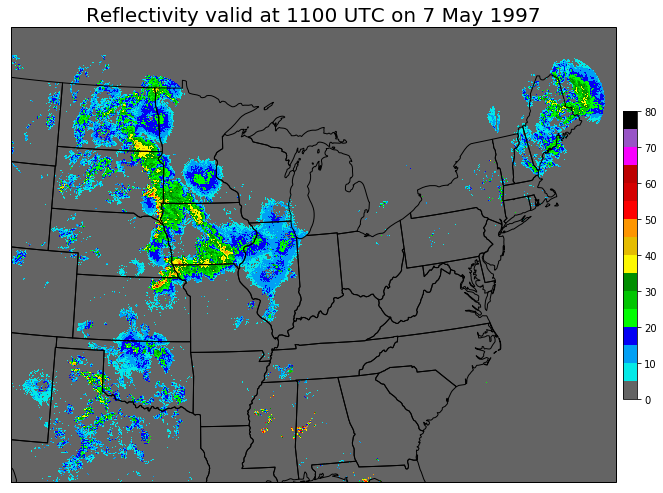

In [1]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from utils.colors import radar_colormap
from utils.mapping_help import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

data_location = "../data"

to_proj = ccrs.AlbersEqualArea(central_longitude=-95, central_latitude=38.0000)
from_proj = ccrs.PlateCarree()

img = imread(data_location + "/radar_data/BREF_970507_1100.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 1100 UTC on 7 May 1997", fontsize=20)

MCS: 82.0%

area:47988
convex_area:99652
eccentricity:0.8611731503820806
intense_area:828
convection_area:4584
convection_stratiform_ratio:0.09552388097024256
intense_stratiform_ratio:0.0172543135783946
intense_convection_ratio:0.1806282722513089
mean_intensity:27.553971826289903
max_intensity:55
intensity_variance:49.74129392702154
major_axis_length:417.3661656505161
minor_axis_length:212.15211368419403
solidity:0.4815558142335327
filename:None


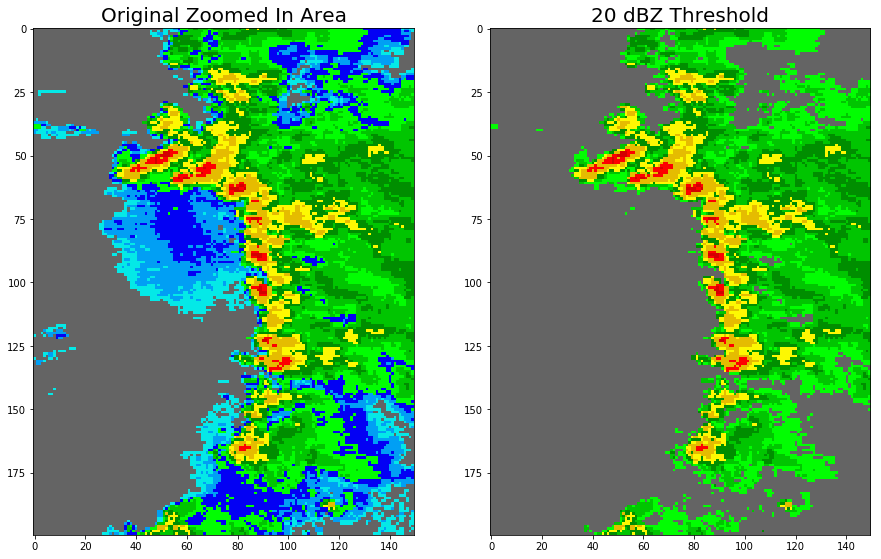

In [2]:
from scipy.ndimage.measurements import label
from skimage.measure import regionprops
from utils.features import calc_features, feature_list
import pickle

plt.rcParams['figure.figsize'] = 15, 15

rf_clf = pickle.load(open(data_location + "/classifiers/my_random_forest.pkl", "rb"))
labels= ['MCS', 'Unorganized', 'Tropical', 'Synoptic', 'Clutter']

orig = img[450:650, 1650:1800]
thresh = 1*(orig>=4)

ax = plt.subplot(1, 2, 1)
ax.imshow(orig*5, norm=norm, cmap=cmap)
ax.set_title("Original Zoomed In Area", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
ax.set_title("20 dBZ Threshold", fontsize=20)

props = regionprops(thresh, intensity_image=orig)[0]

features = calc_features(props=props)

feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

class_name = rf_clf.predict(feature_vector.reshape(1,-1))[0]
proba = rf_clf.predict_proba(feature_vector.reshape(1,-1))[0]

perc = float(proba[np.argmax(proba)])*100

print(labels[class_name] +  ": %.1f" % perc + '%\n')
[print(x + ":" + str(y)) for (x, y) in features.items()];

MCS: 90.0%

area:25600
convex_area:52180
eccentricity:0.8869520583562207
intense_area:956
convection_area:4960
convection_stratiform_ratio:0.19375
intense_stratiform_ratio:0.03734375
intense_convection_ratio:0.19274193548387097
mean_intensity:30.69140625
max_intensity:65
intensity_variance:70.02586364746094
major_axis_length:299.09609929775553
minor_axis_length:138.14097338811928
solidity:0.4906094288999617
filename:None


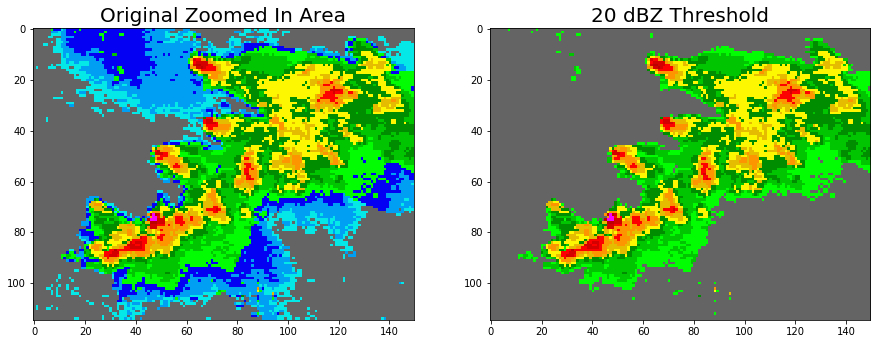

In [3]:
orig = img[660:775, 1700:1850]
thresh = 1*(orig>=4)

ax = plt.subplot(1, 2, 1)
ax.imshow(orig*5, norm=norm, cmap=cmap)
ax.set_title("Original Zoomed In Area", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
ax.set_title("20 dBZ Threshold", fontsize=20)

props = regionprops(thresh, intensity_image=orig)[0]

features = calc_features(props=props)

feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

class_name = rf_clf.predict(feature_vector.reshape(1,-1))[0]
proba = rf_clf.predict_proba(feature_vector.reshape(1,-1))[0]

perc = float(proba[np.argmax(proba)])*100

print(labels[class_name] +  ": %.1f" % perc + '%\n')
[print(x + ":" + str(y)) for (x, y) in features.items()];

Synoptic: 65.0%

area:244148
convex_area:1134596
eccentricity:0.8890594168898871
intense_area:1812
convection_area:14296
convection_stratiform_ratio:0.05855464718121795
intense_stratiform_ratio:0.007421727804446483
intense_convection_ratio:0.12674874090654728
mean_intensity:26.392106427249047
max_intensity:65
intensity_variance:41.75848611295851
major_axis_length:1430.568223008256
minor_axis_length:654.9024347895541
solidity:0.21518496451600394
filename:None


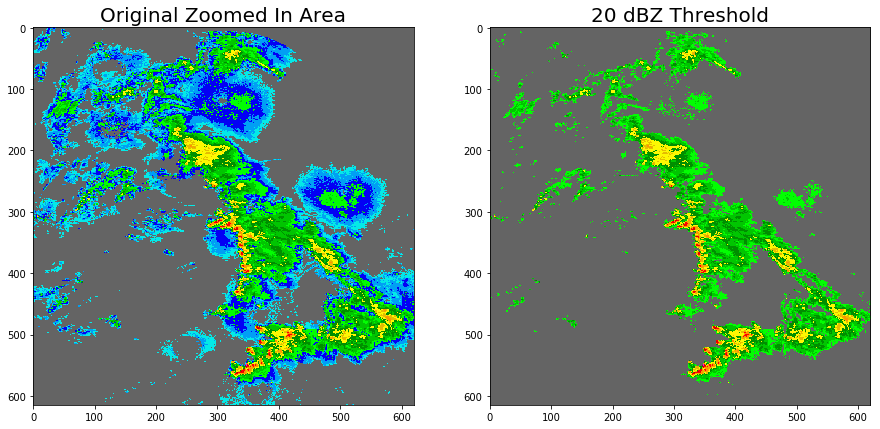

In [4]:
orig = img[185:800, 1400:2020]
thresh = 1*(orig>=4)

ax = plt.subplot(1, 2, 1)
ax.imshow(orig*5, norm=norm, cmap=cmap)
ax.set_title("Original Zoomed In Area", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
ax.set_title("20 dBZ Threshold", fontsize=20)

props = regionprops(thresh, intensity_image=orig)[0]

features = calc_features(props=props)

feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

class_name = rf_clf.predict(feature_vector.reshape(1,-1))[0]
proba = rf_clf.predict_proba(feature_vector.reshape(1,-1))[0]

perc = float(proba[np.argmax(proba)])*100

print(labels[class_name] +  ": %.1f" % perc + '%\n')
[print(x + ":" + str(y)) for (x, y) in features.items()];

Unorganized: 52.0%

area:10400
convex_area:37700
eccentricity:0.9341317795734829
intense_area:124
convection_area:1336
convection_stratiform_ratio:0.12846153846153846
intense_stratiform_ratio:0.011923076923076923
intense_convection_ratio:0.09281437125748503
mean_intensity:27.630769230769232
max_intensity:55
intensity_variance:58.59828402366864
major_axis_length:330.3117933717296
minor_axis_length:117.89763014025421
solidity:0.27586206896551724
filename:None


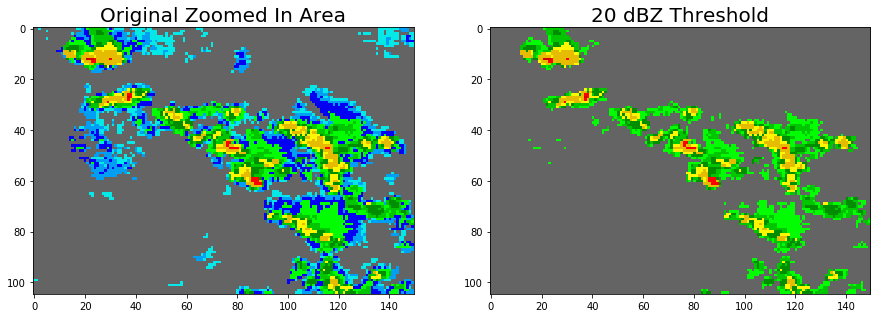

In [5]:
orig = img[945:1050, 1450:1600]
thresh = 1*(orig>=4)

ax = plt.subplot(1, 2, 1)
ax.imshow(orig*5, norm=norm, cmap=cmap)
ax.set_title("Original Zoomed In Area", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
ax.set_title("20 dBZ Threshold", fontsize=20)

props = regionprops(thresh, intensity_image=orig)[0]

features = calc_features(props=props)

feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

class_name = rf_clf.predict(feature_vector.reshape(1,-1))[0]
proba = rf_clf.predict_proba(feature_vector.reshape(1,-1))[0]

perc = float(proba[np.argmax(proba)])*100

print(labels[class_name] +  ": %.1f" % perc + '%\n')
[print(x + ":" + str(y)) for (x, y) in features.items()];

Text(0.5,1,'Reflectivity valid at 0520 UTC on 1 April 2008')

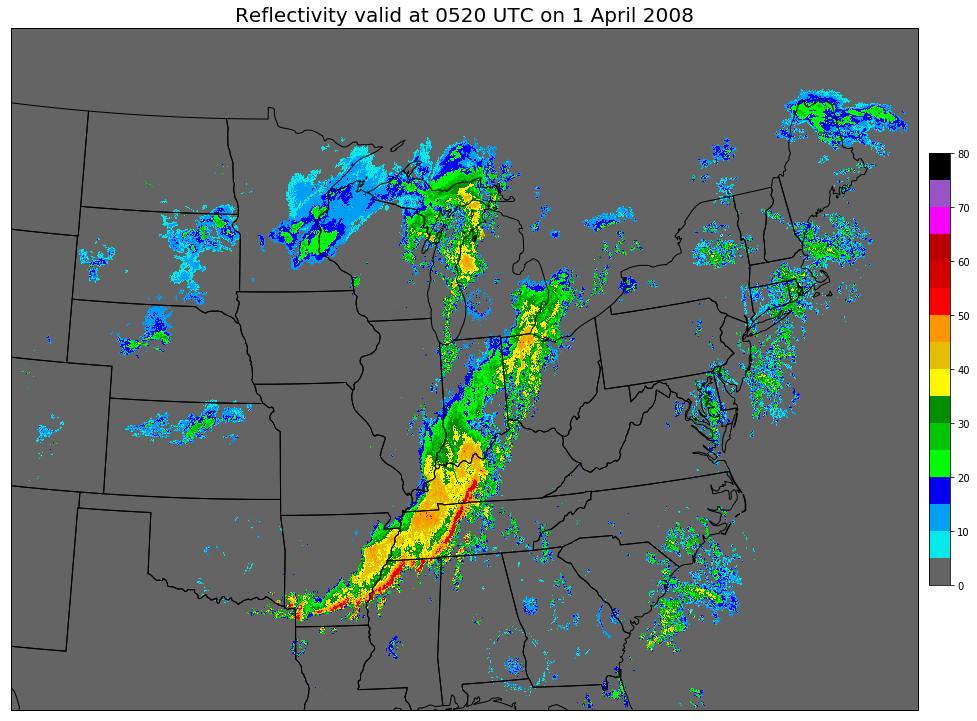

In [6]:
img = imread(data_location + "/radar_data/BREF_080401_0520.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 0520 UTC on 1 April 2008", fontsize=20)

MCS: 93.0%

area:222040
convex_area:508848
eccentricity:0.9361147757222112
intense_area:10640
convection_area:73744
convection_stratiform_ratio:0.33212033867771573
intense_stratiform_ratio:0.04791929382093316
intense_convection_ratio:0.144282924712519
mean_intensity:33.12214015492704
max_intensity:65
intensity_variance:74.77845234641677
major_axis_length:1059.7454667089537
minor_axis_length:372.70681075610224
solidity:0.43635820520076724
filename:None


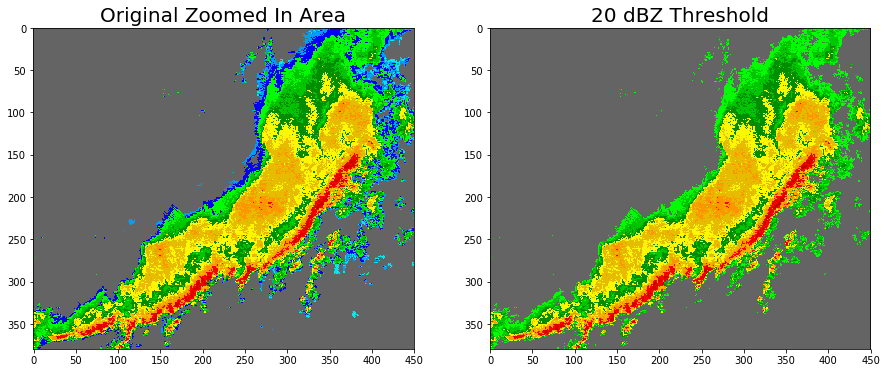

In [7]:
orig = img[720:1100, 1900:2350]
thresh = 1*(orig>=4)

ax = plt.subplot(1, 2, 1)
ax.imshow(orig*5, norm=norm, cmap=cmap)
ax.set_title("Original Zoomed In Area", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
ax.set_title("20 dBZ Threshold", fontsize=20)

props = regionprops(thresh, intensity_image=orig)[0]

features = calc_features(props=props)

feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

class_name = rf_clf.predict(feature_vector.reshape(1,-1))[0]
proba = rf_clf.predict_proba(feature_vector.reshape(1,-1))[0]

perc = float(proba[np.argmax(proba)])*100

print(labels[class_name] +  ": %.1f" % perc + '%\n')
[print(x + ":" + str(y)) for (x, y) in features.items()];